SentenceTransformers provides models that can embed images and text into a joint vector space, whcih can be used for image search.

---



In [1]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
model = SentenceTransformer('clip-ViT-B-32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Unsplash Dataset
Here we use the Unsplash Dataset Lite, which contains about 25k images.

In [11]:
#!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [12]:
#!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [3]:
# here we only use the first 3000 photos to make computation fast
img_names = list(glob.glob('photos/*.jpg'))[:3000]
print(len(img_names))

3000


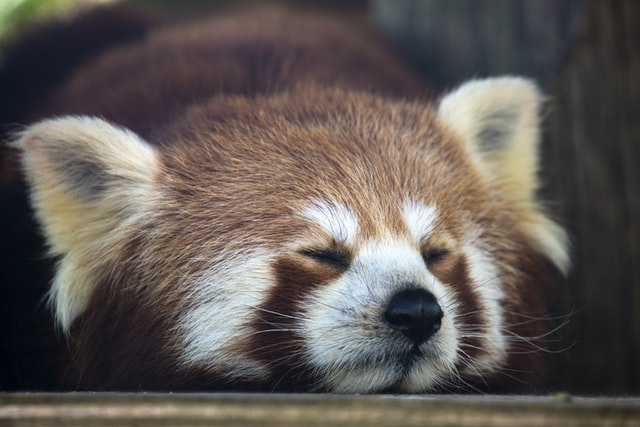

In [4]:
# show image
a = Image.open(img_names[0])
a

### Image Search

In [5]:
# embedding images
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

In [6]:
# create image search function
img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  #print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.show()

Query:  cat
photos/LTG3VYE6X7U.jpg


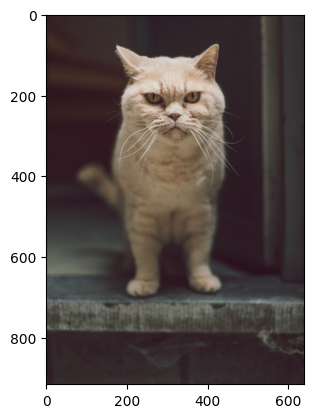

photos/Ri8c2qFg32A.jpg


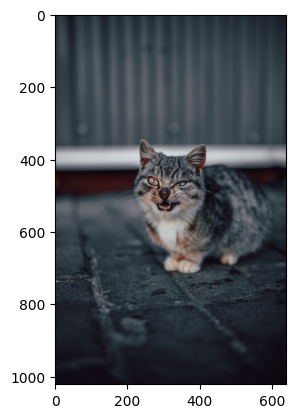

photos/G21-GaAZrrs.jpg


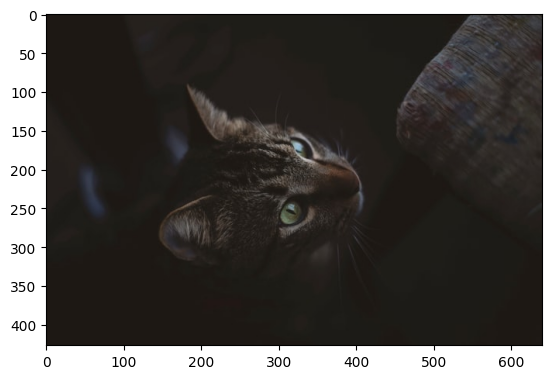

In [8]:
# text to image search
search('cat')

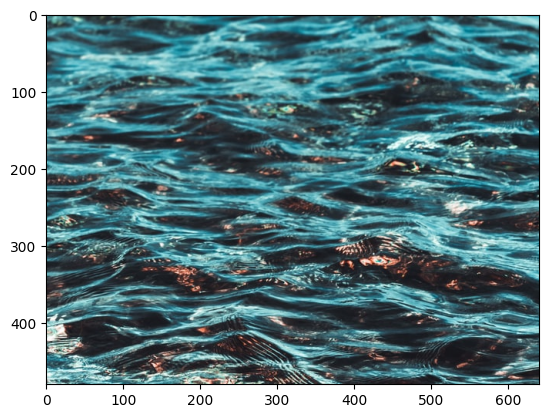

In [9]:
# image to image search
image = Image.open(img_names[123])
plt.imshow(image)
plt.show()

Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7DD5A65AD120>
photos/owlRMtPv5Ao.jpg


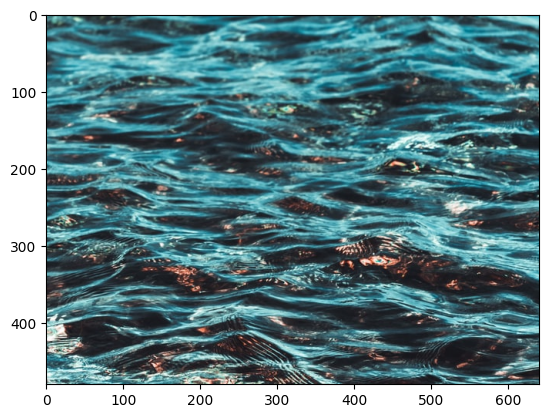

photos/CdPvDv7kQ4o.jpg


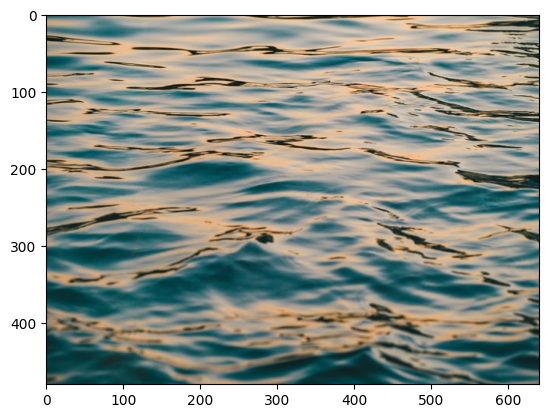

photos/Z_1PR49D1ac.jpg


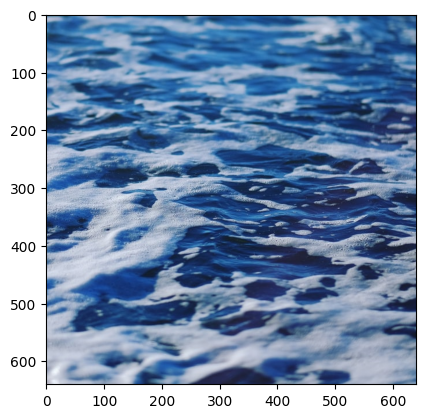

In [10]:
search(image)